In [1]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

`randn`行列式的绝对值随着行列式的size增大而急剧增大, 逼近$\sqrt{n!}$;

已知stirling近似
$$
n!\approx\sqrt{2\pi n}(\frac{n}{e}) ^n
$$

In [2]:
linalg.det(np.random.randn(10, 10))

5681.088568955751

In [3]:
linalg.det(np.random.randn(100, 100))

-4.0790529213535455e+78

In [4]:
linalg.det(np.random.randn(200, 200))

6.115438742716715e+185

`np.linalg.det()`, `scipy.linalg.det()`速度差不多

In [5]:
%timeit -r3 linalg.det(np.random.randn(200, 200))

1.3 ms ± 26.5 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


In [6]:
%timeit -r3 np.linalg.det(np.random.randn(200, 200))

1.3 ms ± 57.9 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


### for normal distribution

In [7]:
N=20
Ns=np.arange(10, N*20+10, 20)
normal_dets=np.zeros(N)
uniformed_dets=np.zeros(N)
for i, num in enumerate(Ns):
    normal_dets[i]=linalg.det(np.random.randn(num, num))
    uniformed_dets[i]=linalg.det(np.random.rand(num, num))

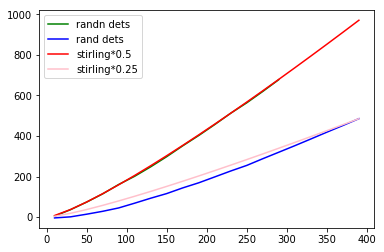

In [8]:
plt.plot(Ns, np.log(np.abs(normal_dets)), 'g', label='randn dets')
plt.plot(Ns, np.log(np.abs(uniformed_dets)), 'b', label='rand dets')

# stirling like
stirling_seq=0.5*np.log(2*np.pi*Ns)+Ns*(np.log(Ns)-1)
plt.plot(Ns, stirling_seq*0.5,'r', label='stirling*0.5')
plt.plot(Ns, stirling_seq*0.25, 'pink', label='stirling*0.25')
plt.legend()